In [573]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import pickle

In [427]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Prodigy InfoTech\Task-01\UNdata_Export.csv")
df

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Afghanistan,2022,Urban,Male,Estimate - de facto,"Final figure, incomplete/questionable reliability",2022.0,4332170.0,1
1,Afghanistan,2022,Urban,Female,Estimate - de facto,"Final figure, incomplete/questionable reliability",2022.0,4242202.0,1
2,Afghanistan,2022,Rural,Male,Estimate - de facto,"Final figure, incomplete/questionable reliability",2022.0,12347224.0,1
3,Afghanistan,2022,Rural,Female,Estimate - de facto,"Final figure, incomplete/questionable reliability",2022.0,11841240.0,1
4,Afghanistan,2021,Urban,Male,Estimate - de facto,"Final figure, incomplete/questionable reliability",2022.0,4190731.0,1
...,...,...,...,...,...,...,...,...,...
4040,108,Estimates based on the results of 2020 census.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4041,109,Estimates are based on the result of 2016 mini...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4042,110,Estimates based on the results of 2009 census ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4043,111,Data of mini-census taken in 2016.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4045 non-null   object 
 1   Year             4045 non-null   object 
 2   Area             3932 non-null   object 
 3   Sex              3932 non-null   object 
 4   Record Type      3932 non-null   object 
 5   Reliability      3932 non-null   object 
 6   Source Year      3932 non-null   float64
 7   Value            3932 non-null   float64
 8   Value Footnotes  2862 non-null   object 
dtypes: float64(2), object(7)
memory usage: 284.5+ KB


In [469]:
df.isna().sum()

Country or Area       0
Year                  0
Area                113
Sex                 113
Record Type         113
Reliability         113
Source Year         113
Value               113
Value Footnotes    1183
dtype: int64

In [471]:
df.drop(columns = "Value Footnotes", inplace = True)

In [473]:
df.dropna(inplace = True)

In [475]:
df.drop(columns = ["Record Type", "Reliability", "Source Year"], inplace = True)

In [477]:
df.rename(columns = {"Country or Area": "Country"}, inplace = True)

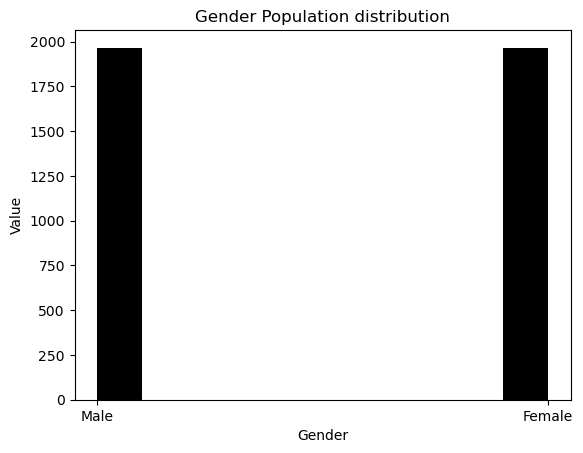

In [303]:
plt.hist(df.Sex, color = "Black")
plt.xlabel("Gender")
plt.ylabel("Value")
plt.title("Gender Population distribution")
plt.show()

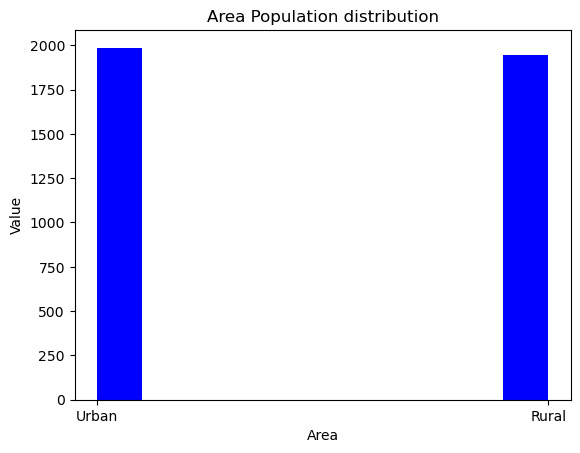

In [575]:
plt.hist(df.Area, color = "Blue")
plt.xlabel("Area")
plt.ylabel("Value")
plt.title("Area Population distribution")
plt.show()

In [250]:
df_countries = df.groupby(["Country", "Year"]).sum().drop(columns = ["Area", "Sex"]).reset_index()

In [296]:
df_countries.Country.unique()

array(['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Canada', 'Cayman Islands', 'Chad', 'Chile',
       'Colombia', 'Congo', 'Costa Rica', 'Cuba', 'Czechia',
       "Côte d'Ivoire", 'Dominican Republic', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gambia', 'Georgia',
       'Ghana', 'Greenland', 'Guadeloupe', 'Guinea', 'Guinea-Bissau',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lesotho', 'Liberia',
       'Libya', 'Lithuania', 'Madagascar'

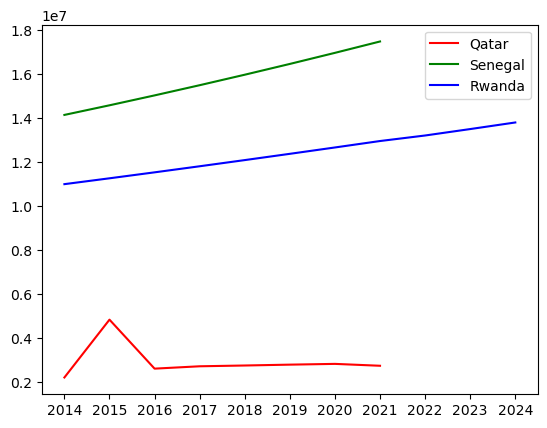

In [571]:
plt.plot(df_countries[df_countries["Country"] == "Qatar"]["Year"], 
         df_countries[df_countries["Country"] == "Qatar"]["Value"]
         , color = "red", label = "Qatar")

plt.plot(df_countries[df_countries["Country"] == "Senegal"]["Year"], 
         df_countries[df_countries["Country"] == "Senegal"]["Value"], 
         color = "green", label = "Senegal")

plt.plot(df_countries[df_countries["Country"] == "Rwanda"]["Year"], 
         df_countries[df_countries["Country"] == "Rwanda"]["Value"], 
         color = "blue", label = "Rwanda")
plt.legend()
plt.show()

In [485]:
population = df.groupby(["Country", "Year"]).sum().drop(columns = ["Sex", "Area"]).reset_index()

In [543]:
def PopulationPredict():
    label = int(input("Enter the country label:"))
    year = int(input("Enter the year:"))
    population["Country_label"] = LabelEncoder().fit_transform(population.Country)
    model_data = population.drop(columns = ["Country", "Value"])
    x = model_data[model_data["Country_label"] == label]
    y = population[population["Country_label"] == label]["Value"]
    
    Lmodel = LinearRegression()
    Lmodel.fit(x, y)
    return Lmodel.predict([[year, label]])

In [579]:
PopulationPredict()

Enter the country label: 2
Enter the year: 2025


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47598496.74444449])

In [549]:
population.head(35)

,Country,Year,Value,Country_label
0,Afghanistan,2014,26556754.0,0
1,Afghanistan,2015,27101365.0,0
2,Afghanistan,2016,27657145.0,0
3,Afghanistan,2017,28224323.0,0
4,Afghanistan,2018,30075018.0,0
5,Afghanistan,2019,30725560.0,0
6,Afghanistan,2020,31390171.0,0
7,Afghanistan,2021,32069160.0,0
8,Afghanistan,2022,32762836.0,0
9,Angola,2014,51690206.0,1
